# Analyzing Time Series Data

-----

In this notebook, we introduce how to work efficiently with time series data in Python, by using the Pandas library.

-----


## Table of Contents


[Data](#Data)


[Date Slicing](#Date-Slicing)


[Rolling Statistics](#Rolling-Statistics)

[Resampling](#Resampling)

-----

Before proceeding with the rest of this notebook, we first include the notebook setup code.

-----

In [1]:
# Set up Notebook

% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# These two lines suppress warnings that sometimes
# occur when making visualizations
import warnings
warnings.filterwarnings('ignore')

# Set global figure properties
import matplotlib as mpl
mpl.rcParams.update({'axes.titlesize' : 20,
                     'axes.labelsize' : 18,
                     'legend.fontsize': 16})

# Set default Seaborn plotting style
sns.set_style('white')

# Extra imports
from datetime import datetime

-----

[[Back to TOC]](#Table-of-Contents)

## Data



-----

In [2]:
# Beijing PM2.5 Data Data Set from UCI ML Repository
# https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv

# First we find our HOME directory
tmp = !echo $HOME

# Second we construct the full path, below our 
# HOME directory to file location
data_file=tmp[0] + '/data/PRSA_data_2010.1.1-2014.12.31.csv'

In [3]:
%%bash -s "$data_file"

# Note, we passed in a Python variable above to the Bash script 
# which is then accessed via positional parameter, or $1 in this case.

# First test if file of interest does not exist
if [ ! -f "$1" ] ; then

# If it does not exist, we grab the file from the Internet and
# store it locally in the data directory

wget -O "$1" https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv
else
    
    echo "File already exists locally."
fi

File already exists locally.


In [4]:
# Load local data file
df = pd.read_csv(data_file, index_col=False)

In [5]:
# Show DataFrame
df.sample(5)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
16878,16879,2011,12,5,6,395.0,-3,-3.0,1032.0,NW,7.59,0,0
35873,35874,2014,2,3,17,6.0,-38,1.0,1026.0,NW,113.12,0,0
39062,39063,2014,6,16,14,138.0,20,28.0,1001.0,cv,3.13,0,0
27352,27353,2013,2,13,16,334.0,-6,5.0,1019.0,SE,13.86,0,0
114,115,2010,1,5,18,59.0,-23,-11.0,1032.0,NW,7.16,0,0


In [6]:
# Build Timestamp Feature
df['TS'] = pd.to_datetime(df.apply(lambda x:
                                   datetime(x.year, x.month, x.day, x.hour),
                                   axis=1))

In [7]:
# Convert to DataFrame Index
df.index = pd.DatetimeIndex(df.TS)

In [8]:
# Index works, but extra columns
df.sample(5)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,TS
TS,,,,,,,,,,,,,,
2014-06-26 00:00:00,39289,2014,6,26,0,159.0,21,23.0,1004.0,SE,56.35,0,0,2014-06-26 00:00:00
2010-05-12 22:00:00,3167,2010,5,12,22,46.0,6,16.0,1017.0,SE,38.00,0,0,2010-05-12 22:00:00
2011-01-23 20:00:00,9309,2011,1,23,20,16.0,-20,-4.0,1033.0,NW,236.94,0,0,2011-01-23 20:00:00
2010-09-30 07:00:00,6536,2010,9,30,7,NaN,8,9.0,1019.0,NW,0.89,0,0,2010-09-30 07:00:00
2012-11-11 08:00:00,25089,2012,11,11,8,9.0,-12,3.0,1013.0,NW,132.30,0,0,2012-11-11 08:00:00


In [9]:
# Remove extra columns
df.drop(['year', 'month', 'day', 'hour', 'TS'], axis=1, inplace=True)

In [10]:
# We now have a compact DataFrame
df.sample(5)

,No,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
TS,,,,,,,,,
2012-09-16 01:00:00,23738,77.0,12,14.0,1022.0,NE,2.68,0,0
2014-04-08 06:00:00,37399,174.0,4,8.0,1015.0,SE,0.89,0,0
2011-04-08 11:00:00,11100,NaN,-12,18.0,1021.0,SE,14.30,0,0
2012-03-24 12:00:00,19525,20.0,-13,14.0,1019.0,NW,101.92,0,0
2010-03-29 22:00:00,2111,317.0,6,8.0,1022.0,NE,0.89,0,3


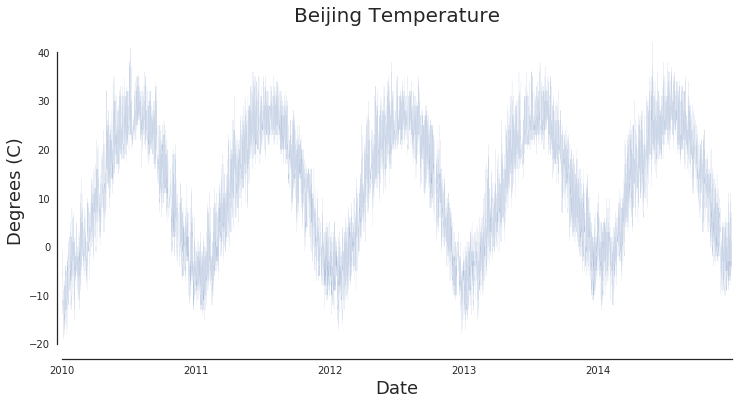

In [11]:
# Plot Temperature 
fig, ax = plt.subplots(figsize=(12, 6))

df.TEMP.plot(lw=0.1, alpha=0.5)

ax.set(title='Beijing Temperature',
      xlabel='Date', ylabel = 'Degrees (C)')

sns.despine(offset=5, trim=True)

-----

[[Back to TOC]](#Table-of-Contents)

## Date Slicing

-----

In [12]:
# Select instances from Date Range
df.TEMP['2011-01-01']

TS
2011-01-01 00:00:00    -9.0
2011-01-01 01:00:00   -10.0
2011-01-01 02:00:00   -11.0
2011-01-01 03:00:00   -10.0
2011-01-01 04:00:00   -12.0
2011-01-01 05:00:00   -11.0
2011-01-01 06:00:00   -12.0
2011-01-01 07:00:00   -12.0
2011-01-01 08:00:00    -8.0
2011-01-01 09:00:00    -7.0
2011-01-01 10:00:00    -6.0
2011-01-01 11:00:00    -4.0
2011-01-01 12:00:00    -3.0
2011-01-01 13:00:00    -2.0
2011-01-01 14:00:00    -1.0
2011-01-01 15:00:00    -1.0
2011-01-01 16:00:00    -1.0
2011-01-01 17:00:00    -5.0
2011-01-01 18:00:00    -3.0
2011-01-01 19:00:00    -5.0
2011-01-01 20:00:00    -7.0
2011-01-01 21:00:00    -5.0
2011-01-01 22:00:00    -9.0
2011-01-01 23:00:00    -7.0
Name: TEMP, dtype: float64

In [13]:
# Select instances from date range and mask
df.TEMP['2011-01'][df.TEMP > 3]

TS
2011-01-31 11:00:00    4.0
2011-01-31 12:00:00    6.0
2011-01-31 13:00:00    7.0
2011-01-31 14:00:00    8.0
2011-01-31 15:00:00    8.0
2011-01-31 16:00:00    8.0
2011-01-31 17:00:00    7.0
2011-01-31 18:00:00    6.0
2011-01-31 19:00:00    4.0
2011-01-31 20:00:00    4.0
Name: TEMP, dtype: float64

In [14]:
# Date slice
df['2011-01':'2012-01'].describe()

,No,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,9504.000000,8702.000000,9504.000000,9504.000000,9504.000000,9504.000000,9504.000000,9504.000000
mean,13512.500000,100.629625,0.781145,11.209175,1018.296507,26.062717,0.071759,0.129524
std,2743.712813,96.620699,14.737447,12.454671,11.290471,53.028787,0.856606,1.030808
min,8761.000000,2.000000,-28.000000,-17.000000,993.000000,0.450000,0.000000,0.000000
25%,11136.750000,27.000000,-12.000000,0.000000,1008.000000,1.790000,0.000000,0.000000
50%,13512.500000,71.000000,0.000000,12.000000,1019.000000,5.810000,0.000000,0.000000
75%,15888.250000,140.000000,15.000000,22.000000,1027.000000,23.700000,0.000000,0.000000
max,18264.000000,994.000000,28.000000,36.000000,1045.000000,585.600000,20.000000,23.000000


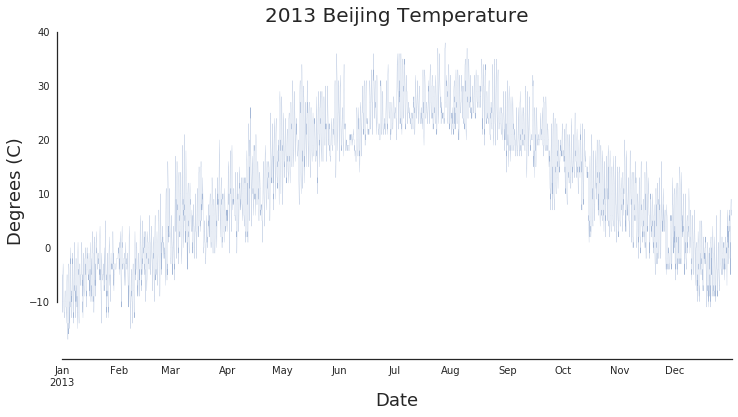

In [15]:
# Plot one year's temperature data
fig, ax = plt.subplots(figsize=(12, 6))

df.TEMP['2013-01':'2013-12'].plot(lw=0.25, alpha=0.5)

ax.set(title='2013 Beijing Temperature',
      xlabel='Date', ylabel = 'Degrees (C)')

sns.despine(offset=5, trim=True)

-----

[[Back to TOC]](#Table-of-Contents)

## Rolling Statistics

-----

In [16]:
mn = pd.rolling_mean(df, 24*14)
md = pd.rolling_median(df, 24*28)
std = pd.rolling_std(df, 24*28)

In [17]:
mn.head()

,No,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
TS,,,,,,,,,
2010-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NW,NaN,NaN,NaN
2010-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NW,NaN,NaN,NaN
2010-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NW,NaN,NaN,NaN
2010-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NW,NaN,NaN,NaN
2010-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NW,NaN,NaN,NaN


In [18]:
mn.tail()

,No,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
TS,,,,,,,,,
2014-12-31 19:00:00,43652.5,NaN,-13.752976,-0.669643,1025.961310,NW,61.345417,0.0,0.0
2014-12-31 20:00:00,43653.5,NaN,-13.773810,-0.669643,1025.976190,NW,62.050446,0.0,0.0
2014-12-31 21:00:00,43654.5,NaN,-13.797619,-0.666667,1025.988095,NW,62.767470,0.0,0.0
2014-12-31 22:00:00,43655.5,NaN,-13.821429,-0.669643,1026.000000,NW,63.493810,0.0,0.0
2014-12-31 23:00:00,43656.5,NaN,-13.842262,-0.660714,1026.011905,NW,64.232083,0.0,0.0


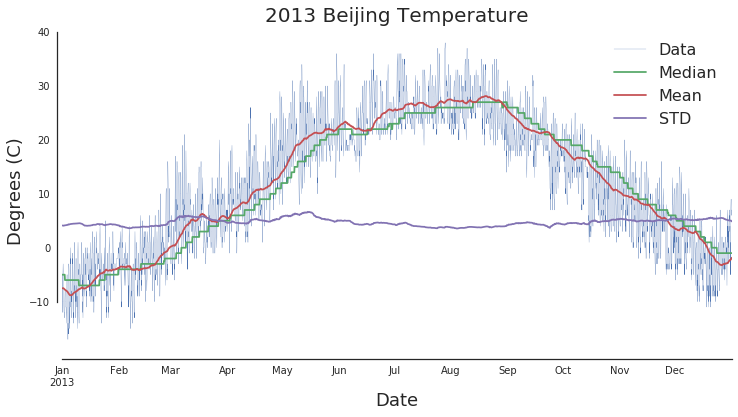

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))

df.TEMP['2013-01':'2013-12'].plot(lw=0.25, label='Data')
md.TEMP['2013-01':'2013-12'].plot(label='Median')
mn.TEMP['2013-01':'2013-12'].plot(label='Mean')
std.TEMP['2013-01':'2013-12'].plot(label='STD')

ax.set(title='2013 Beijing Temperature',
      xlabel='Date', ylabel = 'Degrees (C)')

ax.legend(loc=1)

sns.despine(offset=5, trim=True)

-----

[[Back to TOC]](#Table-of-Contents)

## Resampling


-----

In [20]:
df['TEMP'].head()

TS
2010-01-01 00:00:00   -11.0
2010-01-01 01:00:00   -12.0
2010-01-01 02:00:00   -11.0
2010-01-01 03:00:00   -14.0
2010-01-01 04:00:00   -12.0
Name: TEMP, dtype: float64

In [21]:
df['TEMP'].resample('BMS').head()

TS
2010-01-01    -6.162634
2010-02-01    -1.922619
2010-03-01     3.293011
2010-04-01    11.528646
2010-05-03    20.727011
Freq: BMS, Name: TEMP, dtype: float64

In [22]:
rng = pd.date_range('2010-01-01 12', '2015-12-31 12', freq='D')

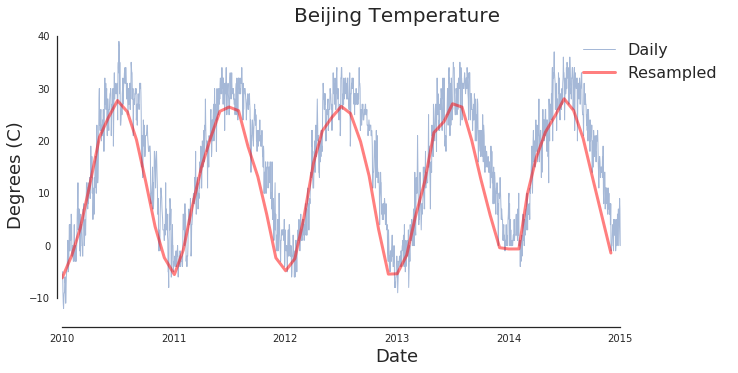

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))

df['TEMP'][rng].plot(lw=1, alpha=0.5, label='Daily')
df['TEMP'].resample('BMS').plot(lw=3, alpha=0.5, color='r', label='Resampled')

ax.set(title='Beijing Temperature',
      xlabel='Date', ylabel = 'Degrees (C)')

ax.legend(loc=1)
sns.despine(offset=5, trim=True)

-----

<font color='red' size = '5'> Student Exercise </font>


In the preceding cells, we introduced XXX and used this approach to fit a model to data with uncertainty. Now that you have run the notebook, go back and make the following changes to see how the results change.

1. Change the 
1. Change the 
2. Try using a
3. Try changing 

-----

## Ancillary Information

The following links are to additional documentation that you might find helpful in learning this material. Reading these web-accessible documents is completely optional.

2. Introduction to [working with time series data][pat] by using Pandas
2. Worked example of using [Pandas for time series analysis][pate]
2. Analyzing stock data with [Pandas][nbta]
3. [Financial analysis][fapt] by using Pandas
3. [Financial analysis with Google trends][fapt2] by using Pandas
4. [Time series plots][tspp] by using Python
5. Somewhat dated discussion of using Pandas for [time series analysis][pbts]
5. [Using Pandas for time series analysis][pt]
6. Time series analysis in [Python][tspr] and R

-----

[pat]: http://www.vincentgregoire.com/introduction-to-pandas/

[pate]: http://www.vincentgregoire.com/crsp-example-dividends/

[nbta]: http://nbviewer.jupyter.org/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/misc/TimeSeriesStockAnalysis.ipynb

[fapt]: https://github.com/twiecki/financial-analysis-python-tutorial/blob/master/1.%20Pandas%20Basics.ipynb

[fapt2]: https://github.com/twiecki/financial-analysis-python-tutorial/blob/master/2.%20Pandas%20replication%20of%20Google%20Trends%20paper.ipynb

[tspp]: http://www.blackarbs.com/blog/advanced-time-series-plots-in-python/1/6/2017

[pbts]: http://earthpy.org/pandas-basics.html

[pt]: http://www.marcelscharth.com/python/time.html

[tspr]: http://connor-johnson.com/2014/11/23/time-series-forecasting-in-python-and-r/

[tsd]: https://www.bundesbank.de/Navigation/EN/Statistics/Time_series_databases/Real_Time_Data/realtime_list_node.html?listId=rt_s311_m.de.n.i.io1.acm03.c.i

**&copy; 2017: Robert J. Brunner at the University of Illinois.**

This notebook is released under the [Creative Commons license CC BY-NC-SA 4.0][ll]. Any reproduction, adaptation, distribution, dissemination or making available of this notebook for commercial use is not allowed unless authorized in writing by the copyright holder.

[ll]: https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode